# Network Example

Once we know how to create a neuron, we can start building a network.


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: Mar 23 2022 13:33:55

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



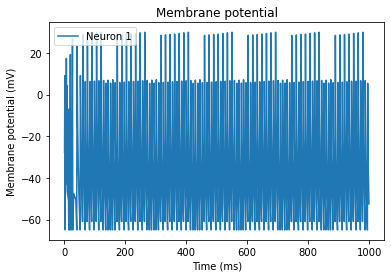

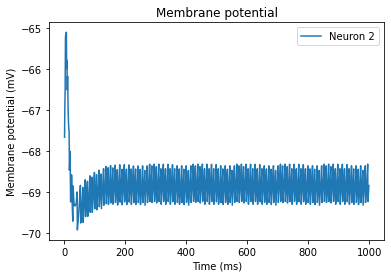

In [1]:
import nest
import nest.voltage_trace
import matplotlib.pyplot as plt

nest.set_verbosity("M_WARNING")
nest.ResetKernel()

neuron1 = nest.Create("izhikevich")
neuron2 = nest.Create("izhikevich")
voltmeter1 = nest.Create("voltmeter")
voltmeter2 = nest.Create("voltmeter")

neuron1.I_e = 400.0  #Only provide input current to neuron 1

nest.Connect(neuron1, neuron2)   #This is a one way synapse
nest.Connect(voltmeter1, neuron1)
nest.Connect(voltmeter2, neuron2)
nest.Simulate(1000.0)

nest.voltage_trace.from_device(voltmeter1)
plt.show()

nest.voltage_trace.from_device(voltmeter2)
plt.show()

**Try adding noise to each of the neurons using the following code:**  
`noise_params = {"dt": 1.0, "std":1000.}`  
`white_noise = nest.Create("noise_generator",params=[noise_params])`  
Remember when you create something, it must be connected in order for it to affect the network.

**Try using a spike generator instead of input current to generate activity in the network, use the code:**  
`spike_generator = nest.Create("poisson_generator",1)`

**Add a spike recorder for each neuron to visualize spiking instead of membrane potential:**  
`nest.Create("spike_recorder")`

**Hint: to plot, you will need to use the following code for extracting the data:**  
`spikes = nest.GetStatus(spike_recorder_name,keys="events")[0]`  
`neurons = spikes['senders']`  
`times = spikes['times']`  
`plt.plot(times,neurons,'o')`  
`plt.xlabel('Time (ms)')`  
`plt.yticks([])   #Remove y ticks`  
`plt.show()`

**Try creating two populations of neurons instead of single neurons.**  
How can you specify the number of neurons per population? How will you connect them? 

# Advanced exercise  
Update the a, b, c, and d parameters to create regularly bursting neuron popultionas (Use Izhikevich's suggested parameters: <https://www.izhikevich.org/publications/spikes.htm>).  
Try to produce rhythmic anti-phasic output from the populations by coupling the two neuron populations through mutual inhibition.  